In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [18]:
data=pd.read_csv("/Users/erdemtasdelen/Downloads/Telco-Customer-Churn.csv")
veri=data.copy()

In [19]:
print(veri)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [20]:
print(veri.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
veri=veri.drop(columns="customerID", axis=1)

In [22]:
veri = veri.rename({
    "gender": "Cinsiyet",
    "SeniorCitizen": "65 Yaş Üstü",
    "Partner": "Medeni Durum",
    "Dependents": "Bakma Sorumluluğu",
    "tenure": "Kişinin Müşteri Olma Süresi (Ay)",
    "PhoneService": "Ev Telefon Aboneliği",
    "MultipleLines": "Birden Fazla Abonelik Durumu",
    "InternetService": "İnternet Aboneliği",
    "OnlineSecurity": "Güvenlik Hizmeti Aboneliği",
    "OnlineBackup": "Yedekleme Hizmeti Aboneliği",
    "DeviceProtection": "Ekipman Güvenlik Aboneliği",
    "TechSupport": "Teknik Destek Aboneliği",
    "StreamingTV": "Netflix",
    "StreamingMovies": "Film Aboneliği",
    "Contract": "Sözleşme Süresi",
    "PaperlessBilling": "Online Fatura",
    "PaymentMethod": "Ödeme Türü",
    "MonthlyCharges": "Aylık Ücret",
    "TotalCharges": "Toplam Ücret",
    "Churn": "Kayıp Durumu"
}, axis=1)


In [23]:
print(veri.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cinsiyet                          7043 non-null   object 
 1   65 Yaş Üstü                       7043 non-null   int64  
 2   Medeni Durum                      7043 non-null   object 
 3   Bakma Sorumluluğu                 7043 non-null   object 
 4   Kişinin Müşteri Olma Süresi (Ay)  7043 non-null   int64  
 5   Ev Telefon Aboneliği              7043 non-null   object 
 6   Birden Fazla Abonelik Durumu      7043 non-null   object 
 7   İnternet Aboneliği                7043 non-null   object 
 8   Güvenlik Hizmeti Aboneliği        7043 non-null   object 
 9   Yedekleme Hizmeti Aboneliği       7043 non-null   object 
 10  Ekipman Güvenlik Aboneliği        7043 non-null   object 
 11  Teknik Destek Aboneliği           7043 non-null   object 
 12  Netfli

In [24]:
for i in veri.columns:
    print(i)

Cinsiyet
65 Yaş Üstü
Medeni Durum
Bakma Sorumluluğu
Kişinin Müşteri Olma Süresi (Ay)
Ev Telefon Aboneliği
Birden Fazla Abonelik Durumu
İnternet Aboneliği
Güvenlik Hizmeti Aboneliği
Yedekleme Hizmeti Aboneliği
Ekipman Güvenlik Aboneliği
Teknik Destek Aboneliği
Netflix
Film Aboneliği
Sözleşme Süresi
Online Fatura
Ödeme Türü
Aylık Ücret
Toplam Ücret
Kayıp Durumu


In [25]:
print(veri[i].dtypes)

object


In [26]:
print(veri[i].unique())

['No' 'Yes']


In [27]:
veri["Cinsiyet"]=["Erkek" if kod=="Male" else "Kadın" for kod in veri["Cinsiyet"]]
veri["65 Yaş Üstü"]=["Evet" if kod==1 else "Hayır" for kod in veri["65 Yaş Üstü"]]
veri["Medeni Durum"]=["Evli" if kod=="Yes" else "Bekar" for kod in veri["Medeni Durum"]]
veri["Bakma Sorumluluğu"]=["Var" if kod=="Yes" else "Yok" for kod in veri["Bakma Sorumluluğu"]]
veri["Ev Telefon Aboneliği"]=["Var" if kod=="Yes" else "Yok" for kod in veri["Ev Telefon Aboneliği"]]
veri["Birden Fazla Abonelik Durumu"]=["Var" if kod=="Yes" else "Yok" for kod in veri["Birden Fazla Abonelik Durumu"]]
veri["İnternet Aboneliği"]=["Yok" if kod=="No" else kod for kod in veri["İnternet Aboneliği"]]
veri["Güvenlik Hizmeti Aboneliği"]=["Var" if kod=="Yes" else "Yok" for kod in veri["Güvenlik Hizmeti Aboneliği"]]
veri["Yedekleme Hizmeti Aboneliği"]=["Var" if kod=="Yes" else "Yok" for kod in veri["Yedekleme Hizmeti Aboneliği"]]
veri["Ekipman Güvenlik Aboneliği"]=["Var" if kod=="Yes" else "Yok" for kod in veri["Ekipman Güvenlik Aboneliği"]]
veri["Teknik Destek Aboneliği"]=["Var" if kod=="Yes" else "Yok" for kod in veri["Teknik Destek Aboneliği"]]
veri["Netflix"]=["Var" if kod=="Yes" else "Yok" for kod in veri["Netflix"]]
veri["Film Aboneliği"]=["Var" if kod=="Yes" else "Yok" for kod in veri["Film Aboneliği"]]
veri["Sözleşme Süresi"]=["1 Aylık" if kod=="Month-to-month" else "1 Yıllık" if kod=="One Year" else "2 Yıllık" for kod in veri["Sözleşme Süresi"]]
veri["Online Fatura"]=["Evet" if kod=="Yes" else "Hayır" for kod in veri["Online Fatura"]]
veri["Ödeme Türü"]=["Elektronik" if kod=="Electronic Check" else "Mail" if kod=="Mailed Check" else "Havale" if kod=="Bank transfer (automatic)" else "Kredi Kartı" for kod in veri["Ödeme Türü"]]
veri["Kayıp Durumu"]=["Evet" if kod=="Yes" else "Hayır" for kod in veri["Kayıp Durumu"]]


In [28]:
for i in veri.columns:
    print(i)
    print(veri[i].unique())

Cinsiyet
['Kadın' 'Erkek']
65 Yaş Üstü
['Hayır' 'Evet']
Medeni Durum
['Evli' 'Bekar']
Bakma Sorumluluğu
['Yok' 'Var']
Kişinin Müşteri Olma Süresi (Ay)
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Ev Telefon Aboneliği
['Yok' 'Var']
Birden Fazla Abonelik Durumu
['Yok' 'Var']
İnternet Aboneliği
['DSL' 'Fiber optic' 'Yok']
Güvenlik Hizmeti Aboneliği
['Yok' 'Var']
Yedekleme Hizmeti Aboneliği
['Var' 'Yok']
Ekipman Güvenlik Aboneliği
['Yok' 'Var']
Teknik Destek Aboneliği
['Yok' 'Var']
Netflix
['Yok' 'Var']
Film Aboneliği
['Yok' 'Var']
Sözleşme Süresi
['1 Aylık' '2 Yıllık']
Online Fatura
['Evet' 'Hayır']
Ödeme Türü
['Kredi Kartı' 'Havale']
Aylık Ücret
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Toplam Ücret
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Kayıp Durumu
['Hayır' 'Evet']


In [29]:
veri["Toplam Ücret"]=pd.to_numeric(veri["Toplam Ücret"],errors="coerce")

In [30]:
print(veri.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cinsiyet                          7043 non-null   object 
 1   65 Yaş Üstü                       7043 non-null   object 
 2   Medeni Durum                      7043 non-null   object 
 3   Bakma Sorumluluğu                 7043 non-null   object 
 4   Kişinin Müşteri Olma Süresi (Ay)  7043 non-null   int64  
 5   Ev Telefon Aboneliği              7043 non-null   object 
 6   Birden Fazla Abonelik Durumu      7043 non-null   object 
 7   İnternet Aboneliği                7043 non-null   object 
 8   Güvenlik Hizmeti Aboneliği        7043 non-null   object 
 9   Yedekleme Hizmeti Aboneliği       7043 non-null   object 
 10  Ekipman Güvenlik Aboneliği        7043 non-null   object 
 11  Teknik Destek Aboneliği           7043 non-null   object 
 12  Netfli

In [31]:
print(veri.isnull().sum())

Cinsiyet                             0
65 Yaş Üstü                          0
Medeni Durum                         0
Bakma Sorumluluğu                    0
Kişinin Müşteri Olma Süresi (Ay)     0
Ev Telefon Aboneliği                 0
Birden Fazla Abonelik Durumu         0
İnternet Aboneliği                   0
Güvenlik Hizmeti Aboneliği           0
Yedekleme Hizmeti Aboneliği          0
Ekipman Güvenlik Aboneliği           0
Teknik Destek Aboneliği              0
Netflix                              0
Film Aboneliği                       0
Sözleşme Süresi                      0
Online Fatura                        0
Ödeme Türü                           0
Aylık Ücret                          0
Toplam Ücret                        11
Kayıp Durumu                         0
dtype: int64


In [32]:
print(veri[["Kişinin Müşteri Olma Süresi (Ay)","Aylık Ücret","Toplam Ücret"]])

      Kişinin Müşteri Olma Süresi (Ay)  Aylık Ücret  Toplam Ücret
0                                    1        29.85         29.85
1                                   34        56.95       1889.50
2                                    2        53.85        108.15
3                                   45        42.30       1840.75
4                                    2        70.70        151.65
...                                ...          ...           ...
7038                                24        84.80       1990.50
7039                                72       103.20       7362.90
7040                                11        29.60        346.45
7041                                 4        74.40        306.60
7042                                66       105.65       6844.50

[7043 rows x 3 columns]


In [33]:
veri["Fark"]=veri["Toplam Ücret"]-(veri["Kişinin Müşteri Olma Süresi (Ay)"]*veri["Aylık Ücret"])
print(veri["Fark"])

0         0.00
1       -46.80
2         0.45
3       -62.75
4        10.25
         ...  
7038    -44.70
7039    -67.50
7040     20.85
7041      9.00
7042   -128.40
Name: Fark, Length: 7043, dtype: float64


In [34]:
print(veri["Fark"].max())

373.2500000000009


In [35]:
print(veri[veri["Kişinin Müşteri Olma Süresi (Ay)"]==0])

     Cinsiyet 65 Yaş Üstü Medeni Durum Bakma Sorumluluğu  \
488     Kadın       Hayır         Evli               Var   
753     Erkek       Hayır        Bekar               Var   
936     Kadın       Hayır         Evli               Var   
1082    Erkek       Hayır         Evli               Var   
1340    Kadın       Hayır         Evli               Var   
3331    Erkek       Hayır         Evli               Var   
3826    Erkek       Hayır         Evli               Var   
4380    Kadın       Hayır         Evli               Var   
5218    Erkek       Hayır         Evli               Var   
6670    Kadın       Hayır         Evli               Var   
6754    Erkek       Hayır        Bekar               Var   

      Kişinin Müşteri Olma Süresi (Ay) Ev Telefon Aboneliği  \
488                                  0                  Yok   
753                                  0                  Var   
936                                  0                  Var   
1082                       

In [36]:
veri=veri.dropna()
print(veri.isnull().sum())

Cinsiyet                            0
65 Yaş Üstü                         0
Medeni Durum                        0
Bakma Sorumluluğu                   0
Kişinin Müşteri Olma Süresi (Ay)    0
Ev Telefon Aboneliği                0
Birden Fazla Abonelik Durumu        0
İnternet Aboneliği                  0
Güvenlik Hizmeti Aboneliği          0
Yedekleme Hizmeti Aboneliği         0
Ekipman Güvenlik Aboneliği          0
Teknik Destek Aboneliği             0
Netflix                             0
Film Aboneliği                      0
Sözleşme Süresi                     0
Online Fatura                       0
Ödeme Türü                          0
Aylık Ücret                         0
Toplam Ücret                        0
Kayıp Durumu                        0
Fark                                0
dtype: int64


In [37]:
print(veri.describe())

       Kişinin Müşteri Olma Süresi (Ay)  Aylık Ücret  Toplam Ücret    Fark
count                           7032.00      7032.00       7032.00 7032.00
mean                              32.42        64.80       2283.30    0.15
std                               24.55        30.09       2266.77   67.26
min                                1.00        18.25         18.80 -370.85
25%                                9.00        35.59        401.45  -28.65
50%                               29.00        70.35       1397.47    0.00
75%                               55.00        89.86       3794.74   28.70
max                               72.00       118.75       8684.80  373.25


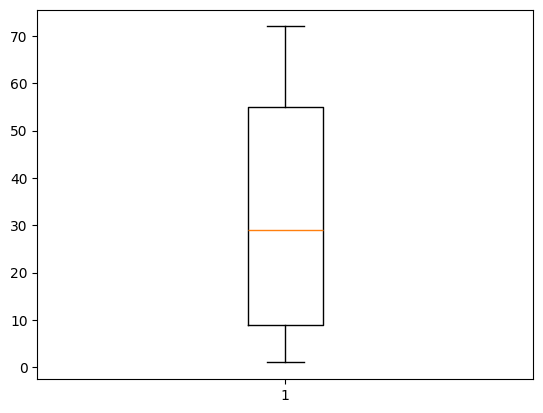

In [38]:
plt.boxplot(veri["Kişinin Müşteri Olma Süresi (Ay)"])
plt.show()

In [39]:
print(veri.select_dtypes(include="object").columns)

Index(['Cinsiyet', '65 Yaş Üstü', 'Medeni Durum', 'Bakma Sorumluluğu',
       'Ev Telefon Aboneliği', 'Birden Fazla Abonelik Durumu',
       'İnternet Aboneliği', 'Güvenlik Hizmeti Aboneliği',
       'Yedekleme Hizmeti Aboneliği', 'Ekipman Güvenlik Aboneliği',
       'Teknik Destek Aboneliği', 'Netflix', 'Film Aboneliği',
       'Sözleşme Süresi', 'Online Fatura', 'Ödeme Türü', 'Kayıp Durumu'],
      dtype='object')


In [40]:
le=LabelEncoder()
degisken=veri.select_dtypes(include="object").columns
veri.update(veri[degisken].apply(le.fit_transform))


In [41]:
print(veri)

     Cinsiyet 65 Yaş Üstü Medeni Durum Bakma Sorumluluğu  \
0           1           1            1                 1   
1           0           1            0                 1   
2           0           1            0                 1   
3           0           1            0                 1   
4           1           1            0                 1   
...       ...         ...          ...               ...   
7038        0           1            1                 0   
7039        1           1            1                 0   
7040        1           1            1                 0   
7041        0           0            1                 1   
7042        0           1            0                 1   

      Kişinin Müşteri Olma Süresi (Ay) Ev Telefon Aboneliği  \
0                                    1                    1   
1                                   34                    0   
2                                    2                    0   
3                          

In [42]:
veri=veri.rename(columns={"Churn": "Kayıp Durumu"})

In [43]:
veri["Kayıp Durumu"]=[1 if kod==0 else 0 for kod in veri["Kayıp Durumu"]]
print(veri)

     Cinsiyet 65 Yaş Üstü Medeni Durum Bakma Sorumluluğu  \
0           1           1            1                 1   
1           0           1            0                 1   
2           0           1            0                 1   
3           0           1            0                 1   
4           1           1            0                 1   
...       ...         ...          ...               ...   
7038        0           1            1                 0   
7039        1           1            1                 0   
7040        1           1            1                 0   
7041        0           0            1                 1   
7042        0           1            0                 1   

      Kişinin Müşteri Olma Süresi (Ay) Ev Telefon Aboneliği  \
0                                    1                    1   
1                                   34                    0   
2                                    2                    0   
3                          

In [44]:
y=veri["Kayıp Durumu"]
X=veri.drop(columns=["Kayıp Durumu"],axis=1)


In [45]:
X=pd.get_dummies(X)
y=veri["Kayıp Durumu"]

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)


In [47]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [48]:
clf=LazyClassifier()
modeller,tahmin=clf.fit(X_train,X_test,y_train,y_test)
sıra=modeller.sort_values(by="Accuracy", ascending=True)
print(modeller)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.74               0.73     0.73      0.75   
NearestCentroid                    0.70               0.73     0.73      0.72   
GaussianNB                         0.73               0.73     0.73      0.75   
LogisticRegression                 0.79  

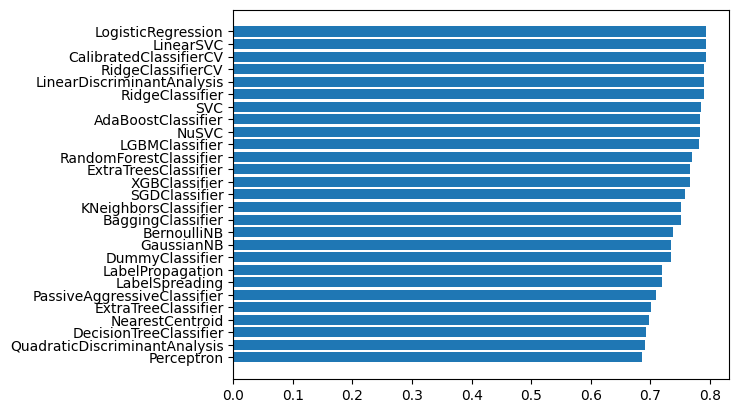

In [49]:
plt.barh(sıra.index,sıra["Accuracy"])
plt.show()

In [50]:
models=["LinearSVC", "SVC", "Ridge", "Logistic", "RandomForest", "LGBM", "XGBM"]

In [51]:
sınıflar=[LinearSVC(random_state=0), SVC(random_state=0), RidgeClassifier(random_state=0),
          LogisticRegression(random_state=0), RandomForestClassifier(random_state=0),
          LGBMClassifier(random_state=0), XGBClassifier()]

In [52]:
parametreler={
    models[0]:{"C":[0.1,1,10,100], "penalty":["l1","l2"]},
    models[1]:{"kernel":["linear", "rbf"], "C":[0.1,1], "gamma":[0.01, 0.001]},
    models[2]:{"alpha":[0.1, 1.0]},
    models[3]:{"C":[0.1,1], "penalty":["l1","l2"]},
    models[4]:{"n_estimators":[1000,2000], "max_depth":[4,10], "min_samples_split":[2,5]},
    models[5]:{"learning_rate":[0.001, 0.01], "n_estimators":[1000,2000], "max_depth":[4,10], "subsample":[0.6,0.8]},
    models[6]:{"learning_rate":[0.001, 0.01], "n_estimators":[1000,2000], "max_depth":[4,10], "subsample":[0.6,0.8]}}

In [53]:
print(parametreler["Ridge"])

{'alpha': [0.1, 1.0]}


In [54]:
def cozum(model):
    model.fit(X_train,y_train)
    return model

In [55]:
def skor(model2):
    tahmin=cozum(model2).predict(X_test)
    acs=accuracy_score(y_test,tahmin)
    return acs*100

In [56]:
print(skor(sınıflar[0]))

79.317697228145
